<a href="https://colab.research.google.com/github/NzambiGrace/ImageClassifierPro/blob/main/Image_Classification_using_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the relevant libraries


In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import cv2

In [ ]:
# Loading the CIFAR-10 dataset using the keras.datasets modelue
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

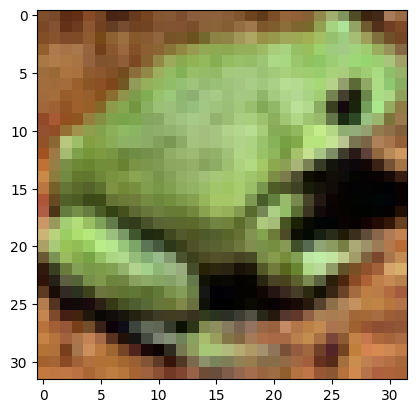

'frog'

In [ ]:
# Displaying image
img = 2100
plt.imshow(x_train[img])
plt.show()
classes[y_train[img][0]]

### Pre-Processing

In [ ]:
# Normalization
x_train =  x_train/255.0
x_test = x_test/255.0

In [ ]:
# Reshaping the images of the dataset to a 2D to fit what Sklearn expects
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples, nx*ny*nrgb))
x_train2.shape

(50000, 3072)

In [ ]:
nsamples , nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples, nx*ny*nrgb))
x_test2.shape


(10000, 3072)

In [ ]:
print("Unique values in y_train:", np.unique(y_train))


Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]


### Modelling -Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# creating an instance of the RandomForest model
model= RandomForestClassifier()
#FITTING IN THE MODEL
model.fit(x_train2, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test2)
y_pred

array([6, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [ ]:
accuracy_score(y_pred, y_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1042
           1       0.55      0.52      0.53      1060
           2       0.33      0.39      0.36       860
           3       0.31      0.36      0.33       852
           4       0.40      0.41      0.40       987
           5       0.39      0.41      0.40       929
           6       0.55      0.47      0.50      1180
           7       0.46      0.51      0.48       905
           8       0.61      0.58      0.59      1054
           9       0.53      0.47      0.50      1131

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.47     10000
weighted avg       0.48      0.47      0.47     10000



In [ ]:
confusion_matrix(y_pred, y_test)

array([[558,  32,  97,  55,  49,  36,  14,  44, 103,  54],
       [ 42, 551,  44,  36,  21,  20,  32,  51,  89, 174],
       [ 48,   8, 334,  66, 142,  86,  90,  53,  15,  18],
       [ 18,  29,  83, 306,  56, 169,  73,  61,  26,  31],
       [ 35,  24, 145,  62, 401,  74, 121,  97,  15,  13],
       [ 22,  38,  63, 179,  47, 385,  52,  83,  35,  25],
       [ 21,  44, 113, 143, 148,  76, 550,  45,  13,  27],
       [ 28,  31,  64,  60,  93,  87,  19, 458,  20,  45],
       [167,  60,  30,  19,  24,  33,   8,  20, 610,  83],
       [ 61, 183,  27,  74,  19,  34,  41,  88,  74, 530]])

### Implementing a KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train2, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred_knn =knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [ ]:
accuracy_score(y_pred_knn, y_test)
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.54      0.38      0.45      1402
           1       0.20      0.65      0.31       317
           2       0.45      0.23      0.30      2006
           3       0.22      0.29      0.25       738
           4       0.51      0.24      0.33      2106
           5       0.22      0.39      0.28       561
           6       0.25      0.35      0.29       716
           7       0.21      0.68      0.32       310
           8       0.66      0.40      0.50      1643
           9       0.14      0.70      0.23       201

    accuracy                           0.34     10000
   macro avg       0.34      0.43      0.33     10000
weighted avg       0.44      0.34      0.35     10000



### Implementing a Decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train2, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc= dtc.predict(x_test2)
y_pred_dtc

array([7, 1, 1, ..., 2, 5, 4], dtype=uint8)

In [ ]:
accuracy_score(y_pred_dtc, y_test)
print(classification_report(y_pred_dtc, y_test))

              precision    recall  f1-score   support

           0       0.35      0.33      0.34      1049
           1       0.28      0.30      0.29       959
           2       0.22      0.21      0.22      1066
           3       0.20      0.19      0.19      1026
           4       0.24      0.24      0.24      1016
           5       0.22      0.22      0.22      1010
           6       0.28      0.29      0.28       960
           7       0.26      0.28      0.27       937
           8       0.40      0.39      0.40      1011
           9       0.29      0.30      0.29       966

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



### Implementing a Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train2, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred_nb = nb.predict(x_test2)
y_pred_nb

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

In [ ]:
accuracy_score(y_pred_nb, y_test)
print(classification_report(y_pred_nb, y_test))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



RandomForest Model outperfroms the other Image classifiers

However, all the Machine Learning Algorithms Perfom poorly as indicated by the accuracies